<a href="https://colab.research.google.com/github/RidhoAnfaal/MachineLearning/blob/main/Midterm_Ridho%20Anfa'al.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import google.colab.drive
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551812 sha256=56c712572ab841832fc8818d7494b67864e89d2fc6f9b6bf014325d2918b3299
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex

# Case Study 2 - CC General

- This case study relates to credit card user data.
- For students with attendance numbers 2, 5, 8, 11, etc.
- Follow these steps and analyze the results.

# Data Preprocessing (20 points)

## 1. Load Data

In [5]:
df = pd.read_csv('/content/drive/MyDrive/ML/UTS2526/2_CC_GENERAL.csv')
print("Data loaded successfully")
print(df.head())

Data loaded successfully
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1          

## 2. Perform data imputation on missing data. Attach your analysis explaining why you used the chosen imputation method. (10 points)

In [6]:
print("Missing values in each column : ")
print(df.isnull().sum())

imputer = SimpleImputer(strategy='mean')
numeric_df = df.select_dtypes(include=[np.number])
df[numeric_df.columns] = imputer.fit_transform(numeric_df)

print("Missing values in each column after imputation : ")
print(df.isnull().sum())

Missing values in each column : 
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
Missing values in each column after imputation : 
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                

### I chose mean to replace missing values, because this dataset contains numerical features and using the mean keeps the data distribution stable.

## 3. Drop irrelevant features (5 points)

In [7]:
print("All columns : ")
print(df.columns)

df = df.drop(['CUST_ID'], axis=1)
print("Columns after dropping CUST_ID : ")
print(df.columns)

All columns : 
Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')
Columns after dropping CUST_ID : 
Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


### I choose to drop CUST_ID column because it's just an identifier and doesn't contribute to the clustering or feature selection process.

# Clustering - 1 (30 points)

## 1. Create a cluster model using KMeans with the number of clusters from 1 to 10. (10 points)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

inertia = []

for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

print("Inertia values : ")
print(inertia)

Inertia values : 
[152149.99999999875, 128957.90955338141, 112609.01071221931, 105366.56908176874, 92157.2309061352, 84852.59400226278, 80786.09414150026, 76542.39710611728, 71729.80111888565, 66612.6924406699]


## 2. Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning. (10 points)

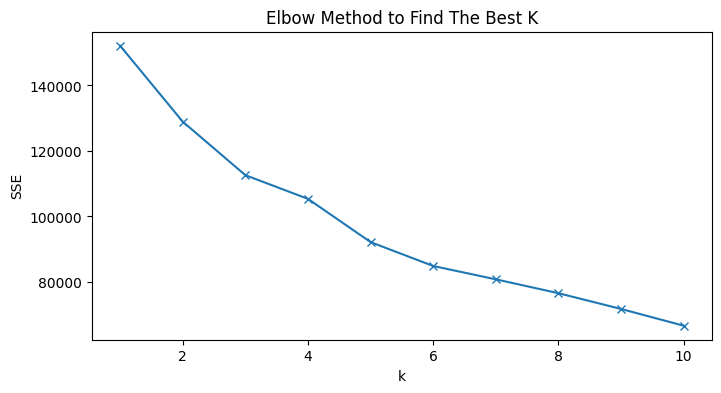

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='x')
plt.title('Elbow Method to Find The Best K')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

### According to my elbow method the curve shows a sharp decrease in SSE from k=1 to k=4, but after k=4 the curve starts to flatten. Therefore the best number of clusters is k=4 because it is the point where the curve bends showing a balance between a low SSE and avoiding to many clusters.

## 3. Calculate the silhouette coefficient value for k=1 to k=10. Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)

k=2, Silhouette Score=0.2799
k=3, Silhouette Score=0.2068
k=4, Silhouette Score=0.1664
k=5, Silhouette Score=0.1923
k=6, Silhouette Score=0.2028
k=7, Silhouette Score=0.1949
k=8, Silhouette Score=0.1900
k=9, Silhouette Score=0.2017
k=10, Silhouette Score=0.2205


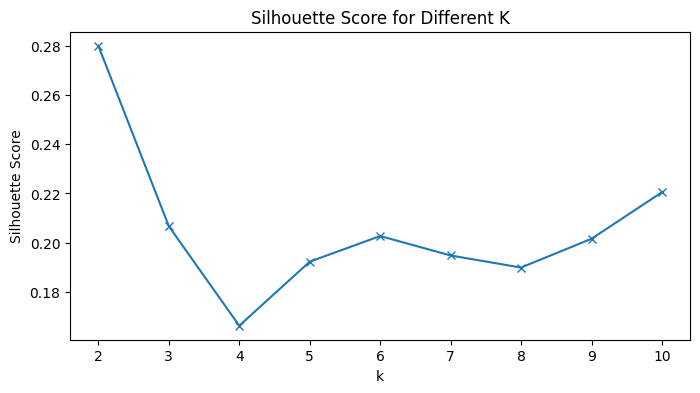

In [10]:
silhouette_scores = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(X_scaled)
  score = silhouette_score(X_scaled, labels)
  silhouette_scores.append(score)

for i, score in enumerate(silhouette_scores, start = 2):
  # print(f"Silhouette score for k = {i} : {score}")
  print(f"k={i}, Silhouette Score={score:.4f}")


plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='x')
plt.title('Silhouette Score for Different K')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

### The highest silhouette score is k=2 with a value of 0.2799. According to silhouette score the best number of clusters is k=2 which is different from elbow method k=4, this means that two clusters yield a clearer and more natural separation of data.

# Clustering - 2 (20 points)

## 1. Create a cluster model using DBSCAN. How many clusters are produced? (10 points)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

dbscan = DBSCAN(eps=1.6, min_samples=5)
labels = dbscan.fit(X_scaled)

labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters produced : {n_clusters}")

Number of clusters produced : 3


## 2. What are the silhouette coefficient and DBI values of the clusters produced by DBSCAN? (10 points)

In [16]:
mask = labels != -1
X_filtered = X_scaled[mask]
labels_clustered = labels[mask]

if len(set(labels_clustered)) > 1 :
  silhouette_score_dbscan = silhouette_score(X_filtered, labels_clustered)
  dbi_score_dbscan = davies_bouldin_score(X_filtered, labels_clustered)
  print(f"Silhouette Score (DBSCAN) : {silhouette_score_dbscan}")
  print(f"Davies Bouldin Index (DBSCAN) : {dbi_score_dbscan}")
else :
  print("DBSCAN produced only 1 cluster")

Silhouette Score (DBSCAN) : 0.2848852415538863
Davies Bouldin Index (DBSCAN) : 0.6177736334484315


### DBSCAN model with eps=1.6 and min_samples=5 produced 3 clusters. The silhouette coefficient value is 0.2849 that indicates the clusters are well difined, and the davies bouldin value is 0.6178 that means the clusters have fair seperation.

# Feature Selection (30 points)
After knowing the performance of the clustering results on the KMeans and DBSCAN models based on the silhouette coefficient and DBI, perform a feature selection process to improve the silhouette coefficient and DBI values. You are allowed to use an iterative process or other methods.


## 1. Which features provide the best silhouette coefficient/DBI values? Include the feature selection process.

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3, random_state=42)
labels_full = kmeans.fit_predict(X_scaled)

silhouette_full = silhouette_score(X_scaled, labels_full)
dbi_full = davies_bouldin_score(X_scaled, labels_full)

print(f"Baseline Silhouette (all features): {silhouette_full:.4f}")
print(f"Baseline DBI (all features): {dbi_full:.4f}")

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_scaled, labels_full)

feature_scores = pd.DataFrame({
    'Feature': df.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("\nFeature Importance Ranking:")
print(feature_scores)

best_results = []

for k in [3, 5, 7]:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X_scaled, labels_full)
    selected_features = df.columns[selector.get_support()]

    # KMeans with selected features
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(X_selected)

    # Evaluate silhouette & DBI
    silhouette = silhouette_score(X_selected, labels)
    dbi = davies_bouldin_score(X_selected, labels)

    best_results.append({
        'Top Features Used': list(selected_features),
        'Silhouette': silhouette,
        'DBI': dbi
    })

results_df = pd.DataFrame(best_results)
print("\nFeature Selection Results:")
print(results_df)

Baseline Silhouette (all features): 0.2068
Baseline DBI (all features): 1.6595

Feature Importance Ranking:
                             Feature        Score
6                PURCHASES_FREQUENCY  8056.016649
8   PURCHASES_INSTALLMENTS_FREQUENCY  4583.559753
9             CASH_ADVANCE_FREQUENCY  4578.944371
5                       CASH_ADVANCE  3835.165726
10                  CASH_ADVANCE_TRX  3303.361602
0                            BALANCE  2264.095827
11                     PURCHASES_TRX  1817.244553
7         ONEOFF_PURCHASES_FREQUENCY  1227.021390
4             INSTALLMENTS_PURCHASES  1062.622475
2                          PURCHASES   903.489476
12                      CREDIT_LIMIT   896.995102
1                  BALANCE_FREQUENCY   742.085044
15                  PRC_FULL_PAYMENT   597.596451
13                          PAYMENTS   520.539824
3                   ONEOFF_PURCHASES   407.659458
14                  MINIMUM_PAYMENTS   216.808725
16                            TENURE    70

### The top 3 features are PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY that produce the highest silhouette coifficient 0.5034 and lowest davies bouldin value is 0.7883 it means well separated.

## 2. Why did you use that feature selection method?

### I used SelectKBest ANOVA F-test feature selection method for unsupervised clustering to identify features with strong statistical relationships with the target or data structure. This method removes irrelevant variables, improves separation between clusters and reduces Davies-Bouldin Index values, making it efficient and easy to implement.

## BONUS - CHALLENGE (30 points)
Build an ANNOY model using the data that has gone through the data preprocessing stage. Perform a query with the 5 nearest values. Does ANNOY query the best cluster you have formed?

In [25]:
best_features = ['PURCHASES_FREQUENCY',
                 'PURCHASES_INSTALLMENTS_FREQUENCY',
                 'CASH_ADVANCE_FREQUENCY']

X_best = df[best_features].values

scaler = StandardScaler()
X_best_scaled = scaler.fit_transform(X_best)

kmeans = KMeans(n_clusters=3, random_state=42)
labels_best = kmeans.fit_predict(X_best_scaled)

# annoy
f = X_best_scaled.shape[1]
annoy_index = AnnoyIndex(f, 'euclidean')

for i, vector in enumerate(X_best_scaled):
    annoy_index.add_item(i, vector)

annoy_index.build(10)

sample_index = 42
neighbors = annoy_index.get_nns_by_item(sample_index, 5)

print(f"Query Point Index : {sample_index}")
print(f"Nearest Neighbors : {neighbors}")

query_cluster = labels_best[sample_index]
neighbor_clusters = labels_best[neighbors]

print(f"Cluster of query point : {query_cluster}")
print(f"Clusters of neighbors  : {neighbor_clusters}")

same_cluster_count = np.sum(neighbor_clusters == query_cluster)
print(f"{same_cluster_count} out of 5 neighbors belong to the same cluster")

Query Point Index : 42
Nearest Neighbors : [4, 233, 586, 764, 958]
Cluster of query point : 0
Clusters of neighbors  : [0 0 0 0 0]
5 out of 5 neighbors belong to the same cluster


### I built an annoy model using the three best features: PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY, then queried to find the five closest neighbors of a data sample with index 42. The results showed that the five closest neighbors belonged to the same cluster as the query point.  This indicates that the model successfully identified very close points, therefore I conclude that the selected features and their clustering structure are effective.